## Multi-linear Regression

Multi-linear Regression is a statistical technique that uses several explanatory variables to predict the outcome of a response variable. The goal of multiple linear regression (MLR) is to model the linear relationship between the explanatory (independent) variables and response (dependent) variable. It is used to determine a mathematical relationship among a number of random variables. In other terms, MLR examines how multiple independent variables are related to one dependent variable. Once each of the independent factors has been determined to predict the dependent variable, the information on the multiple variables can be used to create an accurate prediction on the level of effect they have on the outcome variable. The model creates a relationship in the form of a straight line (linear) that best approximates all the individual data points.



#### Importing Packages

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import scipy.stats as scipy
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
from statistics import mean,stdev

In [43]:
#importing data
df = pd.read_csv('data/salary.csv')

In [3]:
#Checking for missing values
value = df.isnull().sum().sum()
print('Number of missing values: ',value)

Number of missing values:  1


- There is only one missing value in salary

In [4]:
#filling in the missing values
df['salary'].fillna(df['salary'].mean(),inplace = True)

- Filling the missing value in salary with the mean of salary because maybe we might need that data

### 1. Split your data into a training and test set. Create scatterplots, histograms, and a descriptive statistics table of the variables of interest. Do any of the variables need to be transformed to be able to use them in a linear regression model? Which variables seem like good predictors of salary?

In [5]:
# checking features with strong correllation
df2 = df.corr()[abs(df.corr()["salary"]) > 0.45].sort_values(by=["salary"], ascending=False)
df2

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
salary,1.000000,0.119946,0.623135,0.610580,0.407208,0.044552,0.167129,0.701354,0.361447,-0.498485,-0.069622
position,0.701354,0.116596,0.746736,0.485210,-0.013358,0.043680,0.160311,1.000000,0.318129,-0.288812,0.029751
yearsworked,0.623135,-0.246549,1.000000,0.813471,-0.070896,0.028421,-0.040490,0.746736,0.278963,-0.261379,0.055468
yearsrank,0.610580,-0.066403,0.813471,1.000000,-0.026975,0.006516,0.007036,0.485210,0.237787,-0.263953,0.035632
Field,-0.498485,-0.048315,-0.261379,-0.263953,-0.223827,-0.098424,-0.076623,-0.288812,-0.128874,1.000000,-0.000127


- By observing the above DataFrame we see a correlation in some of the features which are:
    - Position
    - Yearsrank
    - Yearsworked
    - Field
    
Of which they highly correllated with our dependant variable.

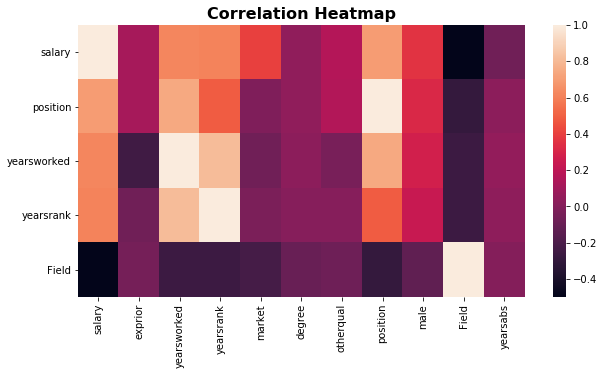

In [6]:
#correllation heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df2)
plt.title('Correlation Heatmap', weight='bold', fontsize=16)
plt.show()

####  Descriptive statistics table of the variables of interest 

In [7]:
#descriptive statistics
df3 = df[['salary','yearsworked','yearsrank','position','Field']].describe()
df3

,salary,yearsworked,yearsrank,position,Field
count,514.000000,514.000000,514.000000,514.000000,514.000000
mean,50863.220098,12.852140,7.052529,2.132296,2.529183
std,12672.762650,9.444695,6.414771,0.820075,1.127420
min,29000.000000,0.000000,0.000000,1.000000,1.000000
25%,40000.000000,4.000000,2.000000,1.000000,2.000000
50%,50165.500000,12.000000,5.000000,2.000000,3.000000
75%,60306.250000,22.000000,12.000000,3.000000,4.000000
max,96156.000000,41.000000,28.000000,3.000000,4.000000


#### Histogram of features of interest

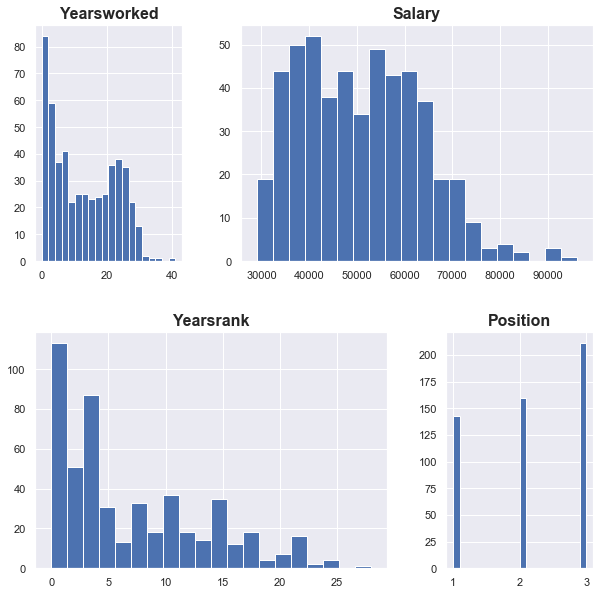

In [8]:
sns.set()
f, axes = plt.subplots(1, 2,figsize=(10, 10))
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)
plt.subplot(grid[0, 0])
plt.hist(df.yearsworked, bins=20)
plt.title('Yearsworked', weight='bold', fontsize=16)

plt.subplot(grid[0, 1:])
plt.hist(df.salary, bins=20)
plt.title('Salary', weight='bold', fontsize=16)

plt.subplot(grid[1, :2])
plt.hist(df.yearsrank, bins=20)
plt.title('Yearsrank', weight='bold', fontsize=16)

plt.subplot(grid[1, 2])
plt.hist(df.position, bins=20)
plt.title('Position', weight='bold', fontsize=16)
plt.show()

##### Salary
- it is skewed to the right
- Majority of the people earn between 35000 dollars & 60000 dollars

##### Years worked
- There are possible outliers 
- it is skewed to the right

##### Yearsrank
- It is skewed to the right
- There are possible outliers
- A handful of people have worked at the current rank for years between 0 & 5 years.


<Figure size 360x360 with 0 Axes>

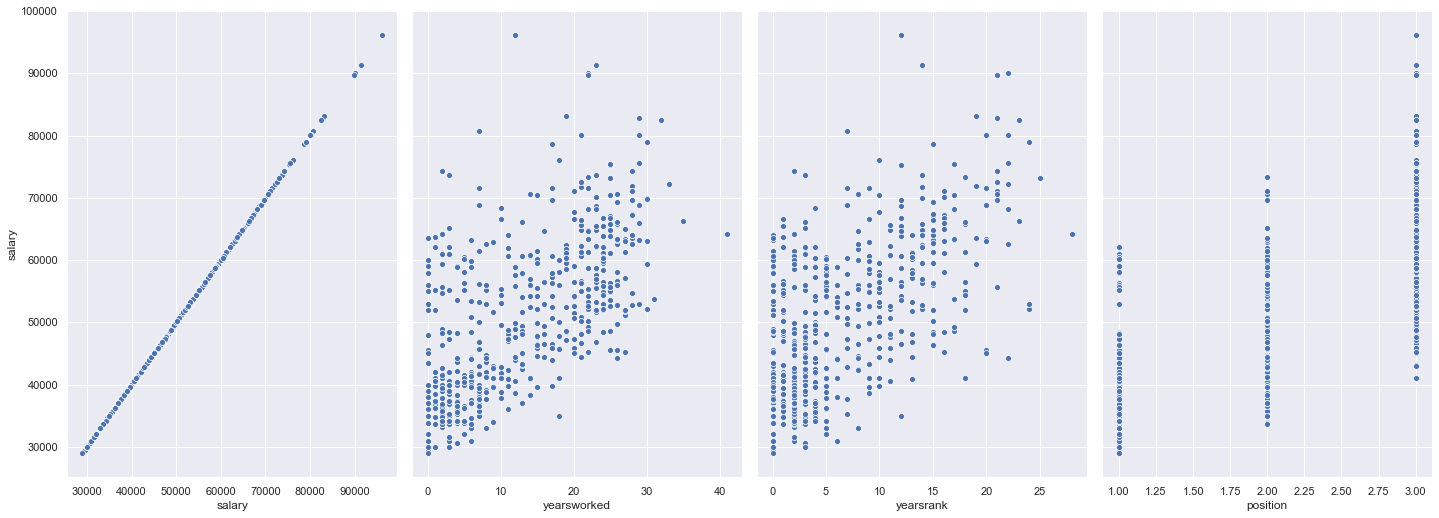

In [9]:
plt.figure(figsize=(5,5))
sns.pairplot(df, x_vars=['salary','yearsworked','yearsrank','position'],
             y_vars='salary',height=7, aspect=0.7, kind='scatter')
plt.show()

#### 2. One-hot encode the variable Field into three dummy variables, using HR as the reference category. You can use pandas’ get_dummies() function for this.

In [54]:
dummies = pd.get_dummies(df['Field'])
# dummies.drop(3, inplace=True, axis=1)

new = dummies.rename(columns={1:'Engineering',2:'Finance',3:'HR',4:'Marketing'})

df4 = pd.concat([df, new] ,axis=1, ignore_index=False)
df4.drop("Field", inplace=True, axis=1)
df4.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,yearsabs,Engineering,Finance,HR,Marketing
0,53000.0,0,0,0,1.17,1,0,1,1,0,0,0,1,0
1,58000.0,1,0,0,1.24,1,0,1,1,0,0,1,0,0
2,45500.0,0,0,0,1.21,1,0,1,1,2,0,0,1,0
3,35782.0,0,2,1,0.99,1,0,1,1,1,0,0,0,1
4,34731.0,0,2,2,0.91,1,0,1,1,1,0,0,0,1


#### 3. Produce a correlation matrix comparing the relationship of salary to the predictor variables. Is there any multicollinearity or other problems that may be a problem in the multiple regression?

In [46]:
df4.corr()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,yearsabs,Engineering,Finance,Marketing
salary,1.000000,0.119989,0.623589,0.610706,0.407214,0.044554,0.167137,0.702122,0.361564,-0.069630,0.426059,0.231626,-0.216884
exprior,0.119989,1.000000,-0.246549,-0.066403,-0.035041,-0.049373,0.264804,0.116596,0.046558,0.132380,0.054154,0.002187,-0.015614
yearsworked,0.623589,-0.246549,1.000000,0.813471,-0.070896,0.028421,-0.040490,0.746736,0.278963,0.055468,0.216959,0.150811,-0.097175
yearsrank,0.610706,-0.066403,0.813471,1.000000,-0.026975,0.006516,0.007036,0.485210,0.237787,0.035632,0.197874,0.169645,-0.122602
market,0.407214,-0.035041,-0.070896,-0.026975,1.000000,0.036408,0.021692,-0.013358,0.181201,-0.167068,0.198393,0.120506,-0.067055
degree,0.044554,-0.049373,0.028421,0.006516,0.036408,1.000000,-0.214717,0.043680,0.061611,0.029311,0.083956,0.034750,-0.053679
otherqual,0.167137,0.264804,-0.040490,0.007036,0.021692,-0.214717,1.000000,0.160311,0.015833,-0.017639,0.029791,0.095418,-0.044491
position,0.702122,0.116596,0.746736,0.485210,-0.013358,0.043680,0.160311,1.000000,0.318129,0.029751,0.261283,0.139835,-0.091475
male,0.361564,0.046558,0.278963,0.237787,0.181201,0.061611,0.015833,0.318129,1.000000,-0.622179,0.150364,0.024864,-0.011548
yearsabs,-0.069630,0.132380,0.055468,0.035632,-0.167068,0.029311,-0.017639,0.029751,-0.622179,1.000000,-0.023555,0.029569,-0.017430


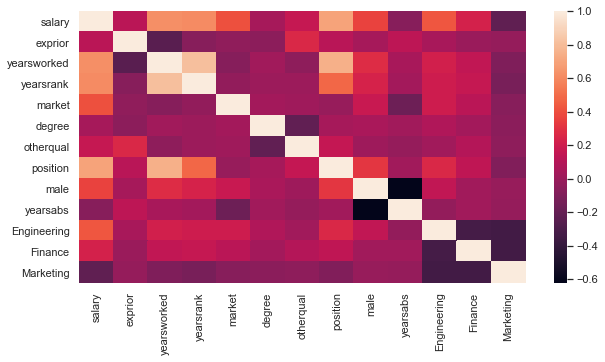

In [47]:
plt.figure(figsize=(10,5))
new_corr = sns.heatmap(df4.corr())

In [48]:
train = df4.drop(['exprior','market','degree','otherqual','male','yearsabs'], axis = 1)
train.head()

,salary,yearsworked,yearsrank,position,Engineering,Finance,Marketing
0,53000.0,0,0,1,0,0,0
1,58000.0,0,0,1,0,1,0
2,45500.0,0,0,1,0,0,0
3,35782.0,2,1,1,0,0,1
4,34731.0,2,2,1,0,0,1


In [61]:
pos = pd.get_dummies(df4.position, prefix = 'Position')
pos.drop('Position_3', inplace=True, axis=1)
pos = pos.rename(columns={"Position_1": "Junior Employee", "Position_2": "Manager", "Position_3":"Executive"})

In [62]:
data = [train, pos]
data = pd.concat(data, axis=1)
data.head()

,salary,yearsworked,yearsrank,position,Engineering,Finance,Marketing,Junior Employee,Manager
0,53000.0,0,0,1,0,0,0,1,0
1,58000.0,0,0,1,0,1,0,1,0
2,45500.0,0,0,1,0,0,0,1,0
3,35782.0,2,1,1,0,0,1,1,0
4,34731.0,2,2,1,0,0,1,1,0


#### Splitting data

In [63]:
#splitting data
x = data.drop(['salary','position','yearsrank'], axis = 1)
y = data.salary

In [64]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

#### 4. Use multiple linear regression to predict salary from all the variables in the training dataset. Interpret the standardised coefficients given in the statsmodels output.

In [65]:
# fit the model to the training data
lm= sm.OLS(y_train,x_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 salary   R-squared (uncentered):                   0.921
Model:                            OLS   Adj. R-squared (uncentered):              0.920
Method:                 Least Squares   F-statistic:                              685.1
Date:                Mon, 30 Mar 2020   Prob (F-statistic):                   4.43e-191
Time:                        13:52:59   Log-Likelihood:                         -3957.2
No. Observations:                 359   AIC:                                      7926.
Df Residuals:                     353   BIC:                                      7950.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
yearsworked      1592.0107     82.565     19.282      0.000    1429.630    1754.392
Engineering      2.876e+04   2144.375     13.410      0.000    2.45e+04     3.3e+04
Finance          2.345e+04   2096.386     11.188      0.000    1.93e+04    2.76e+04
Marketing        1.667e+04   2081.054      8.011      0.000    1.26e+04    2.08e+04
Junior Employee   2.17e+04   1733.997     12.516      0.000    1.83e+04    2.51e+04
Manager          1.374e+04   1594.036      8.619      0.000    1.06e+04    1.69e+04
==============================================================================
Omnibus:                       18.618   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.977
Skew:                           0.436   Prob(JB):                     6.21e-06
Kurtosis:                       3.917   Cond. No.                         60.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 5. Calculate the standardised residuals and standardised predicted values.